In [34]:
import pandas as pd

# Set up the variables
spot_rates = {
    1: 0.055,
    2: 0.06,
    3: 0.0625,
    4: 0.065,
    5: 0.07,
}

notional_principal = 10000000  # $10,000,000

# Calculate discount factors
discount_factors = [(1 / (1 + spot_rates[i]) ** i) for i in range(1, 6)]

# Calculate forward rates as specified
forward_rates = [(discount_factors[i] / discount_factors[i + 1]) - 1 for i in range(4)]
forward_rates = [rate * 100 for rate in forward_rates]  # Convert to percentage

# Create a DataFrame to display the results
result_table = pd.DataFrame(index=range(1, 6))
result_table.index.name = 'Year'
result_table['Spot Rate'] = [spot_rates[i] for i in range(1, 6)]
result_table['Discount Factor'] = discount_factors

# Correct forward rate calculation for each year
result_table['Forward Rate'] = [spot_rates[1] * 100] + forward_rates

# Calculate floating payments for each year and round down
result_table['Floating Payment'] = [int(notional_principal * (forward_rate / 100)) for forward_rate in result_table['Forward Rate']]

# Display the results
result_table

,Spot Rate,Discount Factor,Forward Rate,Floating Payment
Year,,,,
1,0.0550,0.947867,5.500000,550000
2,0.0600,0.889996,6.502370,650236
3,0.0625,0.833706,6.751770,675177
4,0.0650,0.777323,7.253535,725353
5,0.0700,0.712986,9.023585,902358


In [2]:
import pandas as pd

# Set up the variables
spot_rates = {
    1: 0.055,
    2: 0.06,
    3: 0.0625,
    4: 0.065,
    5: 0.07,
}

# Calculate discount factors using the correct formula
discount_factors = [(1 / (1 + spot_rates[i]) ** i) for i in range(1, 6)]

# Create a DataFrame to display the correct discount factors
discount_factors_table = pd.DataFrame(index=range(1, 6))
discount_factors_table.index.name = 'Year'
discount_factors_table['Spot Rate'] = [spot_rates[i] for i in range(1, 6)]
discount_factors_table['Discount Factor'] = discount_factors

# Display the results
print(discount_factors_table)

      Spot Rate  Discount Factor
Year                            
1        0.0550         0.947867
2        0.0600         0.889996
3        0.0625         0.833706
4        0.0650         0.777323
5        0.0700         0.712986


In [4]:
import pandas as pd

# Set up the variables
spot_rates = {
    1: 0.055,
    2: 0.06,
    3: 0.0625,
    4: 0.065,
    5: 0.07,
}

notional_principal = 10000000  # $10,000,000

# Calculate discount factors
discount_factors = [(1 / (1 + spot_rates[i]) ** i) for i in range(1, 6)]

# Calculate forward rates as specified
forward_rates = [(discount_factors[i] / discount_factors[i + 1]) - 1 for i in range(4)]
forward_rates = [rate * 100 for rate in forward_rates]  # Convert to percentage

# Calculate the fixed rate for the swap
FixedSwapRate = [(1 - discount_factors[-1]) / sum(discount_factors)]

# Create a DataFrame to display the results
result_table = pd.DataFrame(index=range(1, 6))
result_table.index.name = 'Year'
result_table['Spot Rate'] = [spot_rates[i] for i in range(1, 6)]
result_table['Discount Factor'] = discount_factors

# Correct forward rate calculation for each year
result_table['Forward Rate'] = [spot_rates[1] * 100] + forward_rates

# Calculate floating payments for each year and round down
result_table['Floating Payment'] = [int(notional_principal * (forward_rate / 100)) for forward_rate in result_table['Forward Rate']]

# Calculate fixed payments for each year
result_table['Fixed Payment'] = [int(notional_principal * FixedSwapRate[0]) for _ in result_table.index]

# Display the results
result_table

,Spot Rate,Discount Factor,Forward Rate,Floating Payment,Fixed Payment
Year,,,,,
1,0.0550,0.947867,5.500000,550000,689625
2,0.0600,0.889996,6.502370,650236,689625
3,0.0625,0.833706,6.751770,675177,689625
4,0.0650,0.777323,7.253535,725353,689625
5,0.0700,0.712986,9.023585,902358,689625


In [5]:
import pandas as pd

# Set up the variables
spot_rates = {
    1: 0.055,
    2: 0.06,
    3: 0.0625,
    4: 0.065,
    5: 0.07,
}

# Calculate discount factors
discount_factors = [(1 / (1 + spot_rates[i]) ** i) for i in range(1, 6)]

# Calculate forward rates as specified
forward_rates = [(discount_factors[i] / discount_factors[i + 1]) - 1 for i in range(4)]
forward_rates = [rate * 100 for rate in forward_rates]  # Convert to percentage

# Create a DataFrame to display the results
result_table = pd.DataFrame(index=range(1, 6))
result_table.index.name = 'Year'
result_table['Spot Rate'] = [spot_rates[i] for i in range(1, 6)]
result_table['Discount Factor'] = discount_factors
result_table['Forward Rate'] = [spot_rates[1]*100] + forward_rates  # First year forward rate is assumed to be 0

# Display the results
result_table

,Spot Rate,Discount Factor,Forward Rate
Year,,,
1,0.0550,0.947867,5.500000
2,0.0600,0.889996,6.502370
3,0.0625,0.833706,6.751770
4,0.0650,0.777323,7.253535
5,0.0700,0.712986,9.023585


In [6]:
# Spot rate curve data
spot_rates = {
    1: 0.02, # 2%
    2: 0.04, # 4%
    3: 0.06, # 6%
    4: 0.07  # 7%
}

# Function to calculate swap rate
def calculate_swap_rate(T, spot_rates):
    numerator = 0
    denominator = 0
    
    for t in range(1, T + 1):
        discount_factor = 1 / ((1 + spot_rates[t]) ** t)
        denominator += discount_factor
    
    numerator = 1 - (1 / ((1 + spot_rates[T]) ** T))
    
    swap_rate = (numerator / denominator)*100
    
    return swap_rate

# Calculate swap rates for each maturity
swap_rates = {}
for T in range(1, 5):
    swap_rates[T] = calculate_swap_rate(T, spot_rates)

swap_rates

{1: 2.000000000000004,
 2: 3.9604111153406985,
 3: 5.843569452459544,
 4: 6.7600085041857465}

In [8]:
import pandas as pd

# Set up the variables
spot_rates = {
    1: 0.055,
    2: 0.06,
    3: 0.0625,
    4: 0.065,
    5: 0.07,
}

notional_principal = 10000000  # $10,000,000

# Calculate discount factors
discount_factors = [(1 / (1 + spot_rates[i]) ** i) for i in range(1, 6)]

# Calculate forward rates as specified
forward_rates = [(discount_factors[i] / discount_factors[i + 1]) - 1 for i in range(4)]
forward_rates = [rate * 100 for rate in forward_rates]  # Convert to percentage

# Create a DataFrame to display the results
result_table = pd.DataFrame(index=range(1, 6))
result_table.index.name = 'Year'
result_table['Spot Rate'] = [spot_rates[i] for i in range(1, 6)]
result_table['Discount Factor'] = discount_factors

# Correct forward rate calculation for each year
result_table['Forward Rate'] = [spot_rates[1] * 100] + forward_rates

# Calculate floating payments for each year and round down
result_table['Floating Payment'] = [int(notional_principal * (forward_rate / 100)) for forward_rate in result_table['Forward Rate']]

# Display the results
result_table

,Spot Rate,Discount Factor,Forward Rate,Floating Payment
Year,,,,
1,0.0550,0.947867,5.500000,550000
2,0.0600,0.889996,6.502370,650236
3,0.0625,0.833706,6.751770,675177
4,0.0650,0.777323,7.253535,725353
5,0.0700,0.712986,9.023585,902358


In [9]:
from datetime import date, timedelta

# Define dates
start_dt = date(2023, 10, 11)
#settle_dt = start_dt + timedelta(days=2)  # Spot settles T+2 (in this case)
end_dt = date(2024, 1, 12)
days = (end_dt - start_dt).days + 2


# Define input data
spot_bid = 1.0599
fwd_bid = 1.064748

usd_yld_bid = 0.056683
eur_yld_bid = 0.038785

# Compute implied yield
print("Days to expiry =", days)
paper = 360 / days * (fwd_bid / spot_bid * (1 + eur_yld_bid * days / 360)) - 1
print("Wrong Formula Implied USD Yield =", paper)
cip_solved = 360 / days * (fwd_bid / spot_bid * (1 + eur_yld_bid * days / 360) - 1)
print("Correct Formula Implied USD Yield =", cip_solved)
print("USD Implied Yield Pct =", round(cip_solved * 100, 4))
print("Spread Bid =", round((cip_solved - usd_yld_bid) * 100, 4))


#https://veridelisi.hashnode.dev/indicator-of-stress-in-us-dollar-funding

Days to expiry = 95
Wrong Formula Implied USD Yield = 2.845769202279261
Correct Formula Implied USD Yield = 0.056295518068735007
USD Implied Yield Pct = 5.6296
Spread Bid = -0.0387


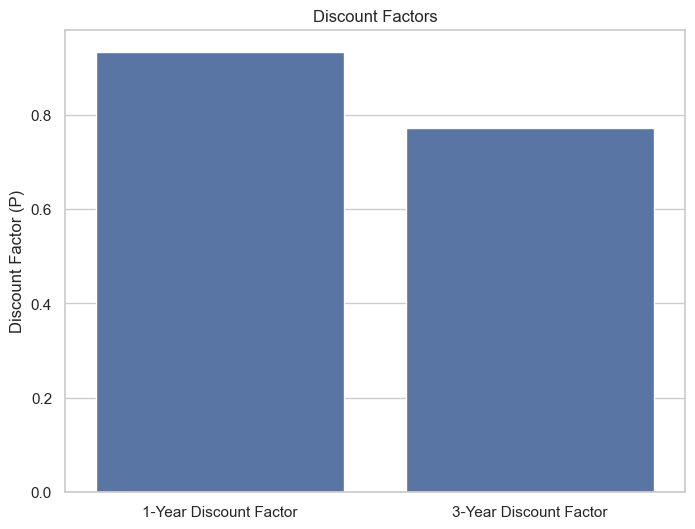

The forward price of a two-year bond to be issued in one year is: 0.83


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Given spot rates
r_1 = 0.07  # 7%
r_3 = 0.09  # 9%

# Calculate discount factors
P_1 = 1 / (1 + r_1)
P_3 = 1 / (1 + r_3)**3

# Calculate the correct forward price of a two-year bond to be issued in one year
F_1_2 = P_3 / P_1

# Create a Seaborn bar plot to visualize the discount factors
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a bar plot for discount factors
sns.barplot(x=['1-Year Discount Factor', '3-Year Discount Factor'], y=[P_1, P_3])

# Customize the plot
plt.title('Discount Factors')
plt.ylabel('Discount Factor (P)')
plt.show()

# Print the corrected forward price
print(f"The forward price of a two-year bond to be issued in one year is: {F_1_2:.2f}")

In [17]:
#https://analystprep.com/study-notes/cfa-level-2/describe-how-zero-coupon-rates-spot-rates-may-be-obtained-from-the-par-curve-by-bootstrapping/
"""
Annual Par-Rates
Year  Par Rate  Zero-coupon rate (Implied Spot rate)
1     2.00      2.00
2     2.60      2.61
3     2.90      2.91
4     3.80      3.87
"""


# r(2) 
# \begin{align*} 1 &=\frac{0.026}{1.02}+\frac{(1+0.026)}{\left(1+r\left(2\right)\right)^2} \\ r (2) & =2.61\% \end{align*}

from scipy.optimize import fsolve
import numpy as np

# Define the equation as a function
def equation(r):
    return 0.026 / 1.02 + 1.026 / (1 + r)**2 - 1

# Use fsolve to find the root (r(2))
r_2 = fsolve(equation, 0.026)
r_2_percentage = r_2 * 100  # Convert to percentage

print(r_2_percentage)


# r(3) 
# \begin{align*} 1 &=\frac{0.029}{1.02}+\frac{0.029}{{1.0261}^2}+\frac{1.029}{\left(1+r\left(3\right)\right)^3} \\ r (3) & = 2.91\% \end{align*}

from scipy.optimize import fsolve

# Define the equation as a function
def equation(r):
    return 0.029 / 1.02 + 0.029 / (1.0261**2) + 1.029 / (1 + r)**3 - 1

# Use fsolve to find the root (r(3))
r_3 = fsolve(equation, 0.029)
r_3_percentage = r_3 * 100  # Convert to percentage

print(r_3_percentage)

# r(4) 
# \begin{align*} 1 &=\frac{0.038}{1.02}+\frac{0.038}{{1.0261}^2}+\frac{0.038}{{1.0291}^3}+\frac{1.038}{\left(1+r\left(4\right)\right)^4} \\ r (4) & = 3.87\% \end{align*}

from scipy.optimize import fsolve

# Define the equation as a function
def equation(r):
    return 0.038 / 1.02 + 0.038 / (1.0261**2) + 0.038 / (1.0291**3) + 1.038 / (1 + r)**4 - 1

# Use fsolve to find the root (r(4))
r_4 = fsolve(equation, 0.038)
r_4_percentage = r_4 * 100  # Convert to percentage

print(r_4_percentage)

#\begin{array}{c|c|c} \textbf{Year} & \textbf{Par Rate} & \textbf{Zero-coupon rate} \\ & & \textbf{(Implied Spot rate)} \\ \hline 1 & 2.00\% & 2.00\% \\ \hline 2 & 2.60\% & 2.61\% \\ \hline 3 & 2.90\% & 2.91\% \\ \hline 4 & 3.80\% & 3.87\% \end{array}

[2.60784678]
[2.91466593]
[3.86854774]


-[1] 0.024000/(1+0.020000)**1+ (1+0.024000)/(1+x)**2-1
-[1] solution 0.024048
-[2] 0.027600/(1+0.020000)**1 +0.027600/(1+0.024048)**2+ (1+0.027600)/(1+x)**3-1
-[2] solution 0.027738
-[3] 0.030840/(1+0.020000)**1 +0.030840/(1+0.024048)**2 +0.030840/(1+0.027738)**3+ (1+0.030840)/(1+x)**4-1
-[3] solution 0.031111
-[4] 0.033756/(1+0.020000)**1 +0.033756/(1+0.024048)**2 +0.033756/(1+0.027738)**3 +0.033756/(1+0.031111)**4+ (1+0.033756)/(1+x)**5-1
-[4] solution 0.034202
-[5] 0.036380/(1+0.020000)**1 +0.036380/(1+0.024048)**2 +0.036380/(1+0.027738)**3 +0.036380/(1+0.031111)**4 +0.036380/(1+0.034202)**5+ (1+0.036380)/(1+x)**6-1
-[5] solution 0.037040


	+zero curve bootstrapped [6 iterations]
	ZeroRate Array [0.02, 0.0240481916370834, 0.0277381195011195, 0.0311111552487150, 0.0342020029061936, 0.0370396604170877]


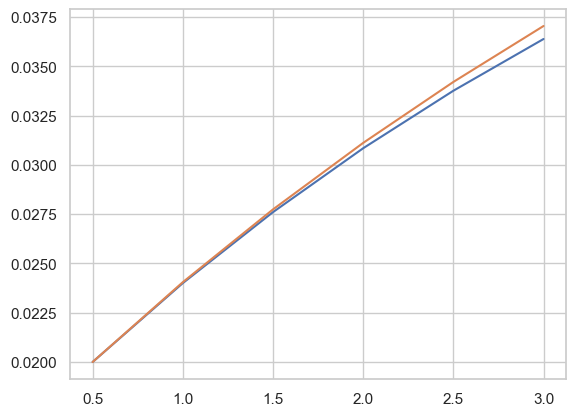

In [33]:
# http://www.financialexamhelp123.com/par-curve-spot-curve-and-forward-curve/
# Alexander Baker, March 2012 Yield Curve Bootstrapper

import pylab
from sympy import Symbol, solve, Abs

x = Symbol('x', real=True)

def g(yieldCurve, zeroRates, n, verbose):
    if len(zeroRates) >= len(yieldCurve):
        print("\n\n\t+zero curve bootstrapped [%d iterations]" % (n))
        return
    else:
        legn = ''
        for i in range(0, len(zeroRates), 1):
            if i == 0:
                legn = '%2.6f/(1+%2.6f)**%d' % (yieldCurve[n], zeroRates[i], i + 1)
            else:
                legn = legn + ' +%2.6f/(1+%2.6f)**%d' % (yieldCurve[n], zeroRates[i], i + 1)
        legn = legn + '+ (1+%2.6f)/(1+x)**%d-1' % (yieldCurve[n], n + 1)

        if verbose:
            print("-[%d] %s" % (n, legn.strip()))

        rate1 = solve(eval(legn), x)
        rate1 = min([Abs(r) for r in rate1])

        if verbose:
            print("-[%d] solution %2.6f" % (n, float(rate1)))

        zeroRates.append(rate1)
        g(yieldCurve, zeroRates, n + 1, verbose)

verbose = True
tenors = [0.5, 1, 1.5, 2, 2.5, 3]

yieldCurve = [0.02, 0.024, 0.0276, 0.030840, 0.033756, 0.036380]

zeroRates = [yieldCurve[0]]

g(yieldCurve, zeroRates, 1, verbose)
print("\tZeroRate Array", zeroRates)

pylab.plot(tenors, yieldCurve)
pylab.plot(tenors, zeroRates)
pylab.show()

In [30]:
#Show that the two-year spot rate of r(2) = 10% and the three-year spot rate of r(3) = 11% are geometric averages of the one-year spot rate and the forward rates.

# Given spot rates and forward rates
r_1 = 0.09  # One-year spot rate
f_1_1 = 0.1101  # One-year forward rate from year 1 to 1
f_2_1 = 0.1303  # One-year forward rate from year 2 to 1

# Calculate r(2) as the geometric average
r_2= ((( (1+ r_1)    * (1+ f_1_1)   )** (1/2))-1)*100

# Calculate r(3) as the geometric average
r_3= ((( (1+ r_1)    * (1+ f_1_1) * (1+ f_2_1)  )** (1/3))-1)*100

# Result
print(r_2)
print(r_3)



10.000409090148388
11.001140931919062


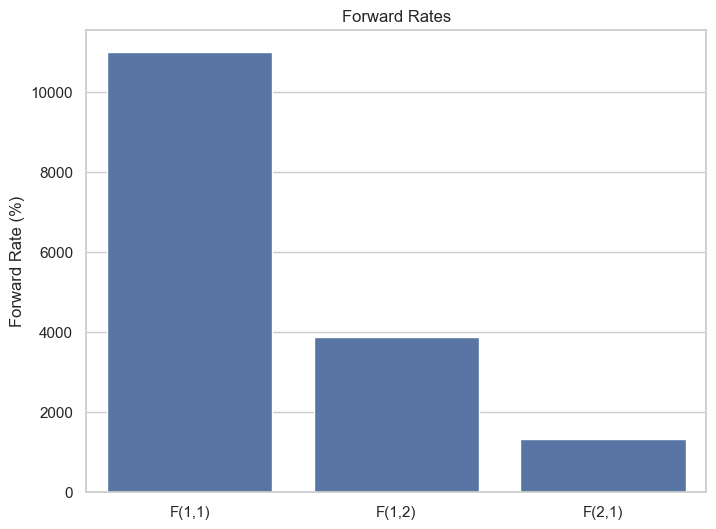

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Given forward rates
F_1_1 = ((1 + r_2)**2 / (1 + r_1)**1 - 1) * 100
F_2_1 = ((1 + r_3)**3 / (1 + r_2)**2 - 1) * 100
F_1_2 = (((1 + r_3)**3 / (1 + r_1)**1) ** 0.5 - 1) * 100

# Create a Seaborn bar plot to visualize the forward rates
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a bar plot for forward rates
sns.barplot(x=['F(1,1)', 'F(1,2)', 'F(2,1)'], y=[F_1_1,  F_1_2, F_2_1])

# Customize the plot
plt.title('Forward Rates')
plt.ylabel('Forward Rate (%)')
plt.show()

In [16]:
import pandas as pd

# Set up the variables
spot_rates = {
    1: 0.055,
    2: 0.06,
    3: 0.0625,
    4: 0.065,
    5: 0.07,
}

notional_principal = 10000000  # $10,000,000

# Calculate discount factors
discount_factors = [(1 / (1 + spot_rates[i]) ** i) for i in range(1, 6)]

# Calculate forward rates as specified
forward_rates = [(discount_factors[i] / discount_factors[i + 1]) - 1 for i in range(4)]
forward_rates = [rate * 100 for rate in forward_rates]  # Convert to percentage

# Calculate the fixed rate for the swap
FixedSwapRate = [(1 - discount_factors[-1]) / sum(discount_factors)]

# Create a DataFrame to display the results
result_table = pd.DataFrame(index=range(1, 6))
result_table.index.name = 'Year'
result_table['Spot Rate'] = [spot_rates[i] for i in range(1, 6)]
result_table['Discount Factor'] = discount_factors

# Correct forward rate calculation for each year
result_table['Forward Rate'] = [spot_rates[1] * 100] + forward_rates

# Calculate floating payments for each year and round down
result_table['Floating Payment'] = [int(notional_principal * (forward_rate / 100)) for forward_rate in result_table['Forward Rate']]

# Calculate fixed payments for each year and round down
result_table['Fixed Payment'] = [int(notional_principal * FixedSwapRate[0]) for _ in result_table.index]

# Calculate present value of fixed payments for each year and round down
result_table['PV Fixed Payment'] = [int(fixed_payment / (1 + spot_rate) ** year) for year, (fixed_payment, spot_rate) in enumerate(zip(result_table['Fixed Payment'], result_table['Spot Rate']), start=1)]

# Calculate present value of floating payments for each year and round down
result_table['PV Floating Payment'] = [int(floating_payment / (1 + spot_rate) ** year) for year, (floating_payment, spot_rate) in enumerate(zip(result_table['Floating Payment'], result_table['Spot Rate']), start=1)]

# Display the results
result_table

,Spot Rate,Discount Factor,Forward Rate,Floating Payment,Fixed Payment,PV Fixed Payment,PV Floating Payment
Year,,,,,,,
1,0.0550,0.947867,5.500000,550000,689625,653672,521327
2,0.0600,0.889996,6.502370,650236,689625,613763,578707
3,0.0625,0.833706,6.751770,675177,689625,574944,562899
4,0.0650,0.777323,7.253535,725353,689625,536061,563833
5,0.0700,0.712986,9.023585,902358,689625,491693,643368


99.01475429766742
97.65625
95.99836946727454
94.10603498524202
92.03539739675895
89.83445342308401
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\tanishk.deoghare\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['pylab', 'solve']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


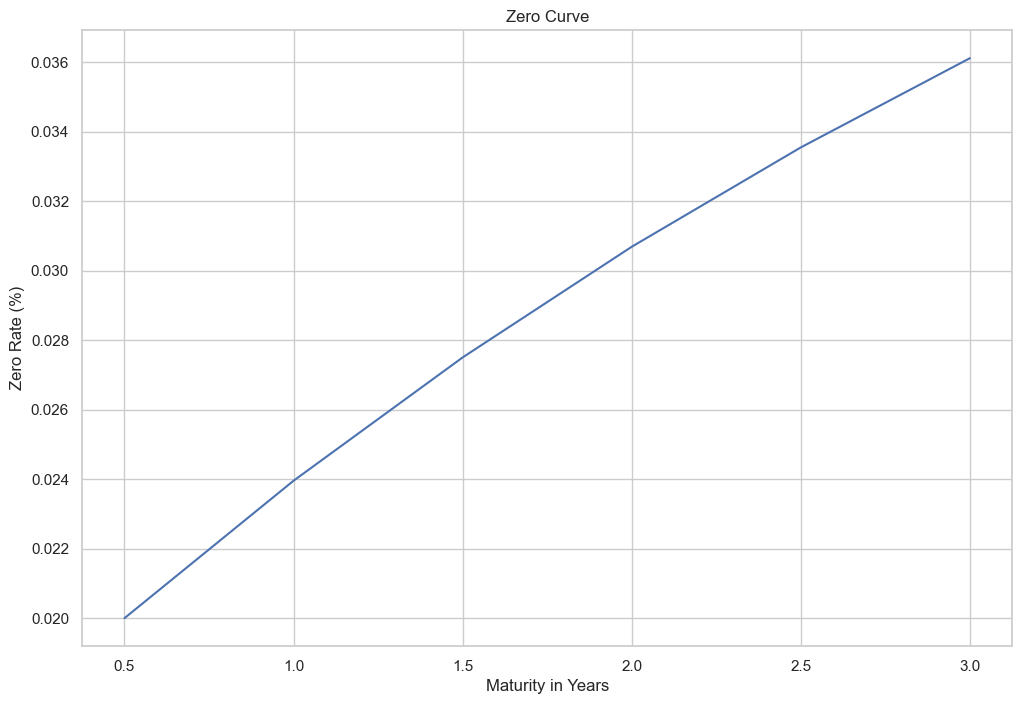

In [23]:
#http://www.financialexamhelp123.com/par-curve-spot-curve-and-forward-curve/
#mastering-python-for-finance-second-edition

def zero_coupon_bond(par, y, t):
    """
    Price a zero coupon bond.
    
    :param par: face value of the bond.
    :param y: annual yield or rate of the bond.
    :param t: time to maturity, in years.
    """
    return par/(1+y)**t

print(zero_coupon_bond(100, 0.02, 0.5))
print(zero_coupon_bond(100, 0.024, 1))
print(zero_coupon_bond(100, 0.0276, 1.5))
print(zero_coupon_bond(100, 0.030840, 2))
print(zero_coupon_bond(100, 0.033756, 2.5))
print(zero_coupon_bond(100, 0.036380, 3))

"""
99.01475429766742
97.65625
95.99836946727454
94.10603498524202
92.03539739675895
89.83445342308401

"""

import math

class BootstrapYieldCurve(object):    
    
    def __init__(self):
        self.zero_rates = dict()
        self.instruments = dict()
        
    def add_instrument(self, par, T, coup, price, compounding_freq=2):
        self.instruments[T] = (par, coup, price, compounding_freq)
    
    def get_maturities(self):
        """ 
        :return: a list of maturities of added instruments 
        """
        return sorted(self.instruments.keys())
    
    def get_zero_rates(self):
        """ 
        Returns a list of spot rates on the yield curve.
        """
        self.bootstrap_zero_coupons()    
        self.get_bond_spot_rates()
        return [self.zero_rates[T] for T in self.get_maturities()]    
        
    def bootstrap_zero_coupons(self):
        """ 
        Bootstrap the yield curve with zero coupon instruments first.
        """
        for (T, instrument) in self.instruments.items():
            (par, coup, price, freq) = instrument
            if coup == 0:
                spot_rate = self.zero_coupon_spot_rate(par, price, T)
                self.zero_rates[T] = spot_rate        
                
    def zero_coupon_spot_rate(self, par, price, T):
        """ 
        :return: the zero coupon spot rate with continuous compounding.
        """
        spot_rate = math.log(par/price)/T
        return spot_rate
                    
    def get_bond_spot_rates(self):
        """ 
        Get spot rates implied by bonds, using short-term instruments.
        """
        for T in self.get_maturities():
            instrument = self.instruments[T]
            (par, coup, price, freq) = instrument
            if coup != 0:
                spot_rate = self.calculate_bond_spot_rate(T, instrument)
                self.zero_rates[T] = spot_rate
                
    def calculate_bond_spot_rate(self, T, instrument):
        try:
            (par, coup, price, freq) = instrument
            periods = T*freq
            value = price
            per_coupon = coup/freq
            for i in range(int(periods)-1):
                t = (i+1)/float(freq)
                spot_rate = self.zero_rates[t]
                discounted_coupon = per_coupon*math.exp(-spot_rate*t)
                value -= discounted_coupon

            last_period = int(periods)/float(freq)        
            spot_rate = -math.log(value/(par+per_coupon))/last_period
            return spot_rate
        except:
            print("Error: spot rate not found for T=", t)


yield_curve = BootstrapYieldCurve()
yield_curve.add_instrument(100, 0.5, 0.02, 99.01475429766742,2)
yield_curve.add_instrument(100, 1.0, 0.024, 97.65625,2  )
yield_curve.add_instrument(100, 1.5, 0.0276, 95.99836946727454,2  )
yield_curve.add_instrument(100, 2.0, 0.030840, 94.10603498524202,2  )
yield_curve.add_instrument(100, 2.5, 0.033756, 92.03539739675895,2  )
yield_curve.add_instrument(100, 3.0, 0.036380, 89.83445342308401,2  )


y = yield_curve.get_zero_rates()
x = yield_curve.get_maturities()


%pylab inline

fig = plt.figure(figsize=(12, 8))
plot(x, y)
title("Zero Curve") 
ylabel("Zero Rate (%)")
xlabel("Maturity in Years");


In [25]:
# https://github.com/jrvarma/bond_pricing
# pip install bond_pricing

from numpy import (array, arange, empty_like, vectorize,  # noqa E401
                   ceil, log, exp, interp, nan, where, dot,
                   concatenate)
import numpy as np
from bond_pricing.simple_bonds import bond_coupon_periods, equiv_rate
from bond_pricing.utils import newton_wrapper, dict_to_dataframe
from bond_pricing.no_scipy_workarounds import no_scipy

def par_yld_to_zero(par, freq=1, return_dataframe=False):
    r"""Bootstrap a complete par bond yield curve to zero

    Parameters
    ----------
    par : sequence of floats
          The par bond yields for various maturities in decimal
          Maturities are spaced 1/freq years apart
    freq : int, optional
          The coupon frequency (equals compounding frequency)
    return_dataframe : bool, optional
         whether to return pandas DataFrame instead of dict
    Returns
    -------
    dict or DataFrame:

          zero_yields: array of zero yields in decimal

          zero_prices: array of zero prices

          forward_rates: array of forward rates in decimal

          (Maturities are spaced 1/freq years apart)

    Examples
    --------
    >>> par_yld_to_zero(
    ... par=[1.0200e-2, 1.2000e-2, 1.4200e-2, 1.6400e-2, 1.9150e-2,
    ...      2.1900e-2, 2.4375e-2, 2.6850e-2, 2.9325e-2, 3.1800e-2],
    ... freq=2, return_dataframe=True)
       zero_yields  zero_prices  forward_rates
    0     0.010200     0.994926       0.010200
    1     0.012005     0.988102       0.013812
    2     0.014220     0.978970       0.018656
    3     0.016445     0.967776       0.023133
    4     0.019245     0.953245       0.030487
    5     0.022068     0.936279       0.036242
    6     0.024630     0.917891       0.040066
    7     0.027218     0.897504       0.045429
    8     0.029837     0.875223       0.050915
    9     0.032492     0.851159       0.056545

    """
    annuity = 0
    prev_zero = 1
    zp = empty_like(par)
    zyld = empty_like(par)
    fwd = empty_like(par)
    for i, cpn in enumerate(par):
        n = i + 1
        pv_intermediate = annuity * cpn/freq
        pv_final = 1 - pv_intermediate
        zero_price = pv_final / (1 + cpn/freq)
        zp[i] = zero_price
        zyld[i] = (zero_price**(-1.0/n) - 1) * freq
        fwd[i] = (prev_zero / zero_price - 1) * freq
        prev_zero = zero_price
        annuity += zero_price
    result = dict(zero_yields=zyld, zero_prices=zp, forward_rates=fwd)
    if return_dataframe:
        return dict_to_dataframe(result)
    else:
        return result

par_yld_to_zero(
    par=[0.02, 0.024, 0.0276, 0.030840, 0.033756, 0.036380],freq=2, return_dataframe=True)

c:\Users\tanishk.deoghare\AppData\Local\anaconda3\envs\LMM\Lib\site-packages\bond_pricing\simple_bonds.py:529: UserWarning: Module isda_daycounters is not installed.
Only 'simple' daycount (basically ACT/365) is available.
To use other daycounts, install isda_daycounters from
https://github.com/miradulo/isda_daycounters
  warn("Module isda_daycounters is not installed.\n"


,zero_yields,zero_prices,forward_rates
0,0.020000,0.990099,0.020000
1,0.024024,0.976402,0.028056
2,0.027669,0.959620,0.034977
3,0.030974,0.940379,0.040922
4,0.033974,0.919227,0.046021
5,0.036700,0.896638,0.050385


Price of 1-year bond: $96.15
forward_rate_1_1: %8.04
Price of 2-year bond: $89.00
Scenario 1 Profit: 4.04%
Scenario 2 Profit: 5.01%
Scenario 3 Profit: 3.08%


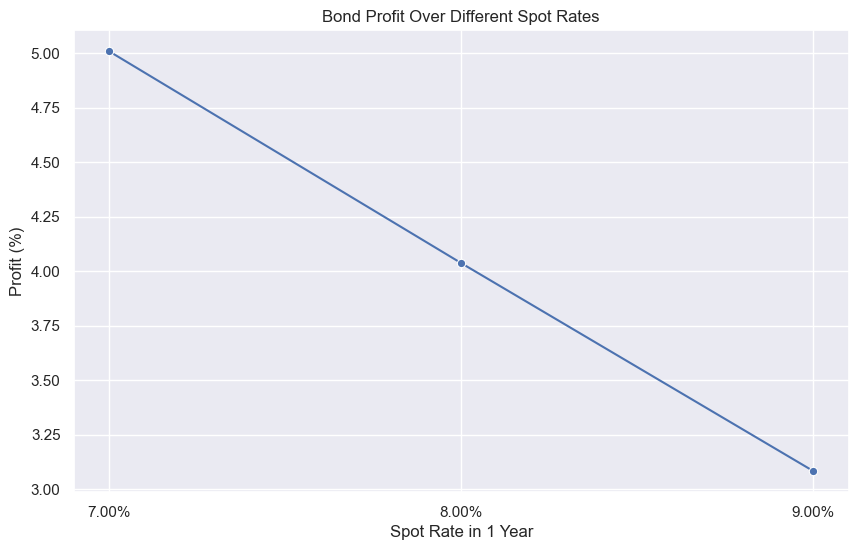

In [26]:
# Initial spot rates
S1 = 0.04  # 4%
S2 = 0.06  # 6%

# Calculate bond prices
price_1_year_bond = 100 / (1 + S1)
price_2_year_bond = 100 / (1 + S2)**2

# Price of 1-year bond: $96.15
# Price of 2-year bond: $89.00

# Calculate forward rate F(1,1)
forward_rate_1_1= ((((1 + S2)**2) /(1 + S1))-1)*100

# forward_rate_1_1 0.08  # 8%



# Scenario 1: Spot rate in one year matches the one-year forward rate_1_1 (8%)
spot_rate_year_1 = 0.08  # 8%
price_2_year_bond_year_1 = 100 / (1 + spot_rate_year_1)
profit_scenario_1 = (price_2_year_bond_year_1 - price_2_year_bond) / price_2_year_bond

# Scenario 2: Spot rate in one year is lower than the one-year forward rate (7%)
spot_rate_year_1_lower = 0.07  # 7%
price_2_year_bond_year_1_lower = 100 / (1 + spot_rate_year_1_lower)
profit_scenario_2 = (price_2_year_bond_year_1_lower - price_2_year_bond) / price_2_year_bond

# Scenario 3: Spot rate in one year is lower than the one-year forward rate (9%)
spot_rate_year_1_higher = 0.09  # 9%
price_2_year_bond_year_1_higher = 100 / (1 + spot_rate_year_1_higher)
profit_scenario_3 = (price_2_year_bond_year_1_higher - price_2_year_bond) / price_2_year_bond

# Print the results
print(f"Price of 1-year bond: ${price_1_year_bond:.2f}")
print(f"forward_rate_1_1: %{forward_rate_1_1:.2f}")
print(f"Price of 2-year bond: ${price_2_year_bond:.2f}")
print(f"Scenario 1 Profit: {profit_scenario_1*100:.2f}%")
print(f"Scenario 2 Profit: {profit_scenario_2*100:.2f}%")
print(f"Scenario 3 Profit: {profit_scenario_3*100:.2f}%")


import matplotlib.pyplot as plt
import seaborn as sns

# Define the spot rates and corresponding profits
spot_rates = [spot_rate_year_1_lower, spot_rate_year_1, spot_rate_year_1_higher]
profits = [profit_scenario_2, profit_scenario_1, profit_scenario_3]

# Create a timeline plot using Seaborn without grid lines
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=spot_rates, y=[profit*100 for profit in profits], marker='o', dashes=False)  # Remove grid lines
ax.set(xlabel='Spot Rate in 1 Year', ylabel='Profit (%)', title='Bond Profit Over Different Spot Rates')
plt.xticks(spot_rates, [f'{rate*100:.2f}%' for rate in spot_rates])

# Display the line plot
plt.show()

In [27]:
#https://github.com/veridelisi/PythonShortCodes/new/main/CFA/Graph/sofrzerocurve.jpg



import datetime
import numpy as np

# Update the spot rate and daydiff values
spot_rate = 0.0531600


# Calculate the continuously compounded discount factor
# Define the dates for the calculation
te = datetime.datetime(2024, 2, 15)  # End date
ts = datetime.datetime(2024, 2, 8)   # Start date
t = datetime.datetime(2024, 2, 6)  # Reference date

# Calculate day differences
daydiff_te_ts = (te - ts).days
daydiff_te_t = (te - t).days

# Compute the continuously compounded discount factor using the zero rate
zero_1 = -np.log(1 / (1 + spot_rate * daydiff_te_ts / 360)) / (daydiff_te_ts / 360)
discount_factor_continuously_compounded = np.exp(-zero_1 * daydiff_te_t / 360)

discount_factor_continuously_compounded


# Update the spot rate
spot_rate = 0.0531728


# Calculate the continuously compounded discount factor
# Define the dates for the calculation
te = datetime.datetime(2024, 2, 22)  # End date
ts = datetime.datetime(2024, 2, 8)   # Start date
t = datetime.datetime(2024, 2, 6)  # Reference date

# Calculate day differences
daydiff_te_ts = (te - ts).days
daydiff_te_t = (te - t).days

# Compute the continuously compounded discount factor using the zero rate
zero_1 = -np.log(1 / (1 + spot_rate * daydiff_te_ts / 360)) / (daydiff_te_ts / 360)
discount_factor_continuously_compounded = np.exp(-zero_1 * daydiff_te_t / 360)

discount_factor_continuously_compounded


# Update the spot rate
spot_rate = 0.053195


# Calculate the continuously compounded discount factor
# Define the dates for the calculation
te = datetime.datetime(2024, 2, 29)  # End date
ts = datetime.datetime(2024, 2, 8)   # Start date
t = datetime.datetime(2024, 2, 6)  # Reference date

# Calculate day differences
daydiff_te_ts = (te - ts).days
daydiff_te_t = (te - t).days

# Compute the continuously compounded discount factor using the zero rate
zero_1 = -np.log(1 / (1 + spot_rate * daydiff_te_ts / 360)) / (daydiff_te_ts / 360)
discount_factor_continuously_compounded = np.exp(-zero_1 * daydiff_te_t / 360)

discount_factor_continuously_compounded

# Update the spot rate
spot_rate = 0.0532340


# Calculate the continuously compounded discount factor
# Define the dates for the calculation
te = datetime.datetime(2024, 3, 8)  # End date
ts = datetime.datetime(2024, 2, 8)   # Start date
t = datetime.datetime(2024, 2, 6)  # Reference date

# Calculate day differences
daydiff_te_ts = (te - ts).days
daydiff_te_t = (te - t).days

# Compute the continuously compounded discount factor using the zero rate
zero_1 = -np.log(1 / (1 + spot_rate * daydiff_te_ts / 360)) / (daydiff_te_ts / 360)
discount_factor_continuously_compounded = np.exp(-zero_1 * daydiff_te_t / 360)

discount_factor_continuously_compounded


# Update the spot rate
spot_rate = 0.0532750


# Calculate the continuously compounded discount factor
# Define the dates for the calculation
te = datetime.datetime(2024, 4, 8)  # End date
ts = datetime.datetime(2024, 2, 8)   # Start date
t = datetime.datetime(2024, 2, 6)  # Reference date

# Calculate day differences
daydiff_te_ts = (te - ts).days
daydiff_te_t = (te - t).days

# Compute the continuously compounded discount factor using the zero rate
zero_1 = -np.log(1 / (1 + spot_rate * daydiff_te_ts / 360)) / (daydiff_te_ts / 360)
discount_factor_continuously_compounded = np.exp(-zero_1 * daydiff_te_t / 360)

discount_factor_continuously_compounded


# Update the spot rate
spot_rate = 0.0532250


# Calculate the continuously compounded discount factor
# Define the dates for the calculation
te = datetime.datetime(2024, 5, 8)  # End date
ts = datetime.datetime(2024, 2, 8)   # Start date
t = datetime.datetime(2024, 2, 6)  # Reference date

# Calculate day differences
daydiff_te_ts = (te - ts).days
daydiff_te_t = (te - t).days

# Compute the continuously compounded discount factor using the zero rate
zero_1 = -np.log(1 / (1 + spot_rate * daydiff_te_ts / 360)) / (daydiff_te_ts / 360)
discount_factor_continuously_compounded = np.exp(-zero_1 * daydiff_te_t / 360)

discount_factor_continuously_compounded

# Update the spot rate
spot_rate = 0.0529360


# Calculate the continuously compounded discount factor
# Define the dates for the calculation
te = datetime.datetime(2024, 6, 10)  # End date
ts = datetime.datetime(2024, 2, 8)   # Start date
t = datetime.datetime(2024, 2, 6)  # Reference date

# Calculate day differences
daydiff_te_ts = (te - ts).days
daydiff_te_t = (te - t).days

# Compute the continuously compounded discount factor using the zero rate
zero_1 = -np.log(1 / (1 + spot_rate * daydiff_te_ts / 360)) / (daydiff_te_ts / 360)
discount_factor_continuously_compounded = np.exp(-zero_1 * daydiff_te_t / 360)

discount_factor_continuously_compounded

np.float64(0.9819486008203815)

In [29]:
#Source: https://rateslib.readthedocs.io/en/latest/z_swpm.html#cook-swpm-doc
#SOFRCURVE: #https://github.com/veridelisi/PythonShortCodes/new/main/CFA/Graph/sofrzerocurve.jpg

import pandas as pd
from rateslib import *

# 6 February 2024 SOFR Market Rates : Curve 490
data = pd.DataFrame({
    "Term": ["1W", "2W", "3W", "1M", "2M", "3M", "4M", "5M", "6M", "7M", "8M", "9M", "10M", "11M", "12M", "18M", "2Y", "3Y", "4Y", "5Y", "6Y", "7Y", "8Y", "9Y", "10Y", "12Y", "15Y", "20Y", "25Y", "30Y", "40Y", "50Y"],
    "Rate": [5.31600, 5.31728, 5.31950, 5.32340, 5.32750, 5.32250, 5.29360, 5.24886, 5.20773, 5.15769,5.10760, 5.05860,5.00365, 4.95200, 4.89506, 4.54145, 4.30220, 4.02810, 3.89550, 3.82646, 3.79230, 3.77327, 3.76390, 3.76185, 3.76315, 3.77600, 3.79400, 3.77500, 3.69700, 3.61000, 3.41500, 3.20710]
})

#Please add 2 days for settlement
data["Termination"] = [add_tenor(dt(2024, 2, 8), _, "F", "nyc") for _ in data["Term"]]

#Show Market Rates with termination 
with pd.option_context("display.float_format", lambda x: '%.6f' % x):
    print(data)
  
#Create sofr curve dt(2024, 2, 6) : 6 February 2024
sofr = Curve(
    id="sofr",
    convention="Act360",
    calendar="nyc",
    modifier="MF",
    interpolation="log_linear",
    nodes={
        **{dt(2024, 2, 6): 1.0},  # <- this is today's DF,
        **{_: 1.0 for _ in data["Termination"]},
    }
)
sofr_args = dict(effective=dt(2024, 2, 8), spec="usd_irs", curves="sofr")
solver = Solver(
    curves=[sofr],
    instruments=[IRS(termination=_, **sofr_args) for _ in data["Termination"]],
    s=data["Rate"],
    instrument_labels=data["Term"],
    id="us_rates",
)

#Print Data
data["DF"] = [float(sofr[_]) for _ in data["Termination"]]

with pd.option_context("display.float_format", lambda x: '%.6f' % x):
    print(data)


from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Assuming dt is an alias for datetime for simplicity
dt = datetime

# Your start date
start_date = dt(2024, 2, 8)

# Define a function to add time based on your term format (e.g., "1W", "2M", "1Y")
def add_time_to_date(start_date, term):
    unit = term[-1]  # Last character (W, M, Y)
    quantity = int(term[:-1])  # All but the last character
    
    if unit == "W":
        return start_date + timedelta(weeks=quantity)
    elif unit == "M":
        return start_date + relativedelta(months=quantity)
    elif unit == "Y":
        return start_date + relativedelta(years=quantity)
    else:
        return None  # For unsupported units

# Your terms
terms = ["1W", "2W", "3W", "1M", "2M", "3M", "4M", "5M", "6M", "7M", "8M", "9M", "10M", "11M", "12M", "18M", "2Y", "3Y", "4Y", "5Y", "6Y", "7Y", "8Y", "9Y", "10Y", "12Y", "15Y", "20Y", "25Y", "30Y", "40Y", "50Y"]

# Calculate dates for each term
dates_for_terms = [add_time_to_date(start_date, term) for term in terms]

# Example of how you might print these dates
for term, date in zip(terms, dates_for_terms):
    print(f"{term}: {date.strftime('%Y-%m-%d')}")

# Now, assuming you have a method to get the zero rate for a given date, you would use these dates in that method.
# For example:
zero_rates = [sofr.shift(7).rate(date, "1d") for date in dates_for_terms]
zero_rates

   Term     Rate Termination
0    1W 5.316000  2024-02-15
1    2W 5.317280  2024-02-22
2    3W 5.319500  2024-02-29
3    1M 5.323400  2024-03-08
4    2M 5.327500  2024-04-08
5    3M 5.322500  2024-05-08
6    4M 5.293600  2024-06-10
7    5M 5.248860  2024-07-08
8    6M 5.207730  2024-08-08
9    7M 5.157690  2024-09-09
10   8M 5.107600  2024-10-08
11   9M 5.058600  2024-11-08
12  10M 5.003650  2024-12-09
13  11M 4.952000  2025-01-08
14  12M 4.895060  2025-02-10
15  18M 4.541450  2025-08-08
16   2Y 4.302200  2026-02-09
17   3Y 4.028100  2027-02-08
18   4Y 3.895500  2028-02-08
19   5Y 3.826460  2029-02-08
20   6Y 3.792300  2030-02-08
21   7Y 3.773270  2031-02-10
22   8Y 3.763900  2032-02-09
23   9Y 3.761850  2033-02-08
24  10Y 3.763150  2034-02-08
25  12Y 3.776000  2036-02-08
26  15Y 3.794000  2039-02-08
27  20Y 3.775000  2044-02-08
28  25Y 3.697000  2049-02-08
29  30Y 3.610000  2054-02-09
30  40Y 3.415000  2064-02-08
31  50Y 3.207100  2074-02-08
SUCCESS: `func_tol` reached after 7 iterati

[<Dual: 5.380717, (sofr0, sofr1, sofr2, ...), [0.0, 5150.5, -5155.8, ...]>,
 <Dual: 5.380603, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 5155.8, ...]>,
 <Dual: 5.384392, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 5.367664, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 5.324608, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 5.204569, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 5.204945, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 4.959544, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 4.808400, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 4.808400, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 4.580228, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 4.413408, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 4.412597, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 4.189312, (sofr0, sofr1, sofr2, ...), [0.0, 0.0, 0.0, ...]>,
 <Dual: 4.189555, (sofr0

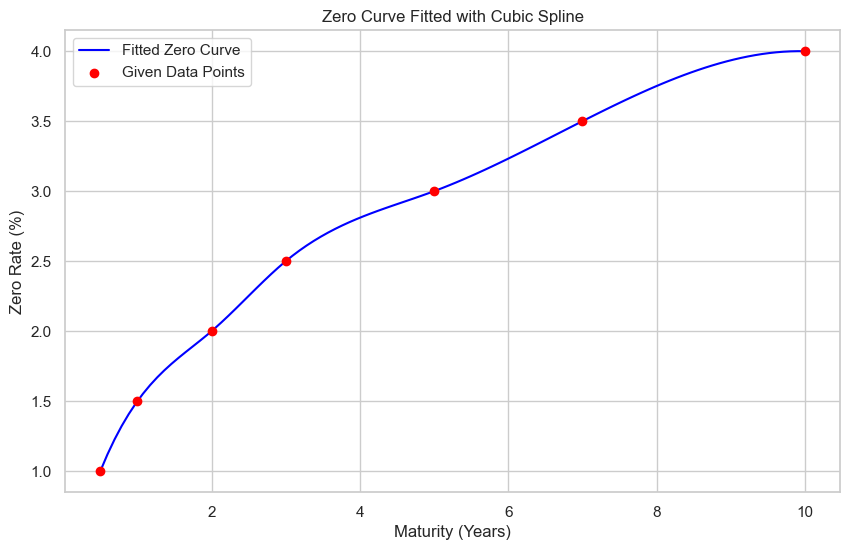

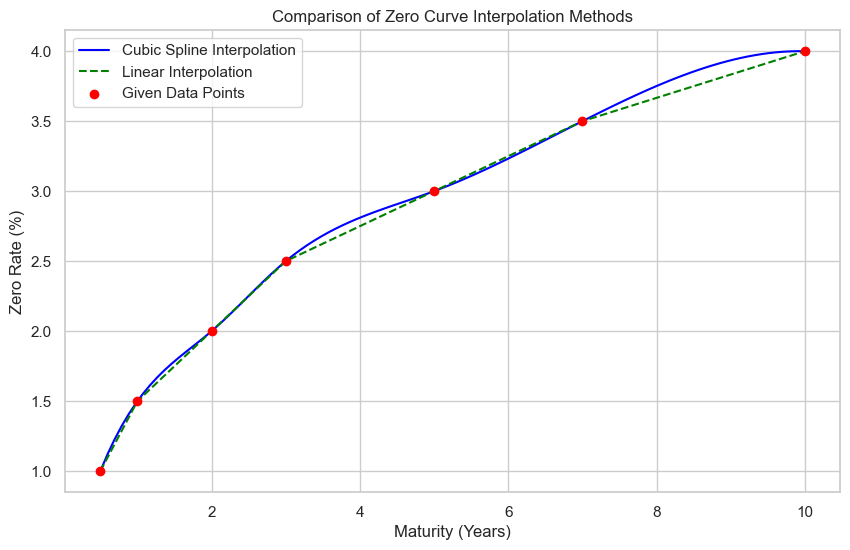

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Given data points: Maturities and corresponding zero rates
maturities = np.array([0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])
zero_rates = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])

# Fit a cubic spline
cs = CubicSpline(maturities, zero_rates)

# Generate maturities for plotting
maturities_plot = np.linspace(min(maturities), max(maturities), 100)
zero_curve = cs(maturities_plot)

# Plot the zero curve
plt.figure(figsize=(10, 6))
plt.plot(maturities_plot, zero_curve, label='Fitted Zero Curve', color='blue')
plt.scatter(maturities, zero_rates, color='red', zorder=5, label='Given Data Points')
plt.title('Zero Curve Fitted with Cubic Spline')
plt.xlabel('Maturity (Years)')
plt.ylabel('Zero Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

from scipy.interpolate import interp1d

# Linear interpolation
linear_interp = interp1d(maturities, zero_rates, kind='linear')

# Generate zero curves for both cubic spline and linear interpolation
zero_curve_linear = linear_interp(maturities_plot)

# Plot the zero curve with both interpolation methods
plt.figure(figsize=(10, 6))
plt.plot(maturities_plot, zero_curve, label='Cubic Spline Interpolation', color='blue')
plt.plot(maturities_plot, zero_curve_linear, label='Linear Interpolation', color='green', linestyle='--')
plt.scatter(maturities, zero_rates, color='red', zorder=5, label='Given Data Points')
plt.title('Comparison of Zero Curve Interpolation Methods')
plt.xlabel('Maturity (Years)')
plt.ylabel('Zero Rate (%)')
plt.legend()
plt.grid(True)
plt.show()